# Kaggle Machine Learning Competition: Predicting Titanic Survivors

Kaggle URL: https://www.kaggle.com/c/titanic
<br>
URL: https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/kaggle/titanic.ipynb

Description
<br>
Evaluation in this Kaggle Competition
<br>
Data Set
<br>
Setup Imports and Variables
<br>
Explore the Data
<br>
Feature: Passenger Classes
<br>
Feature: Sex
<br>
Feature: Embarked
<br>
Feature: Age
<br>
Feature: Family Size
<br>
Final Data Preparation for Machine Learning
<br>
Random Forest: Training
Random Forest: Predicting

# Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Evaluation in this Kaggle Competition
The historical data has been split into two groups, a 'training set' and a 'test set'. For the training set, we provide the outcome ( 'ground truth' ) for each passenger. You will use this set to build your model to generate predictions for the test set.

For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived). Your score is the percentage of passengers you correctly predict.

The Kaggle leaderboard has a public and private component. 50% of your predictions for the test set have been randomly assigned to the public leaderboard ( the same 50% for all users ). Your score on this public portion is what will appear on the leaderboard. At the end of the contest, we will reveal your score on the private 50% of the data, which will determine the final winner. This method prevents users from 'overfitting' to the leaderboard.


# Data Set

VARIABLE DESCRIPTIONS:
<br>
survival &emsp;&emsp;&emsp; Survival
&emsp;&emsp;&emsp;      (0 = No; 1 = Yes)
<br>
pclass &emsp;&emsp;&emsp; Passenger Class &emsp;&emsp;&emsp; (1 = 1st; 2 = 2nd; 3 = 3rd)
<br>
name &emsp;&emsp;&emsp; Name
<br>
sex &emsp;&emsp;&emsp; Sex
<br>
age &emsp;&emsp;&emsp; Age
<br>
sibsp &emsp;&emsp;&emsp; Number of Siblings/Spouses Aboard
<br>
parch &emsp;&emsp;&emsp; Number of Parents/Children Aboard
<br>
ticket &emsp;&emsp;&emsp; Ticket Number
<br>
fare &emsp;&emsp;&emsp; Passenger Fare
<br>
cabin &emsp;&emsp;&emsp; Cabin
<br>
embarked &emsp;&emsp;&emsp; Port of Embarkation &emsp;&emsp;&emsp; (C = Cherbourg; Q = Queenstown; S = Southampton)



SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
<br>
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower


Age is in Years; Fractional if Age less than One (1)
<br>
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
<br>
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
<br>
Parent:   Mother or Father of Passenger Aboard Titanic
<br>
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations..

# Setup Imports and Variables

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

# Explore the Data
Read the data:

In [2]:
df_train = pd.read_csv('Week11_titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, and Embarked are missing values. Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that we have a general idea of the data set contents, we can dive deeper into each column. We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

Text(0.5, 1.0, 'Age Histogram')

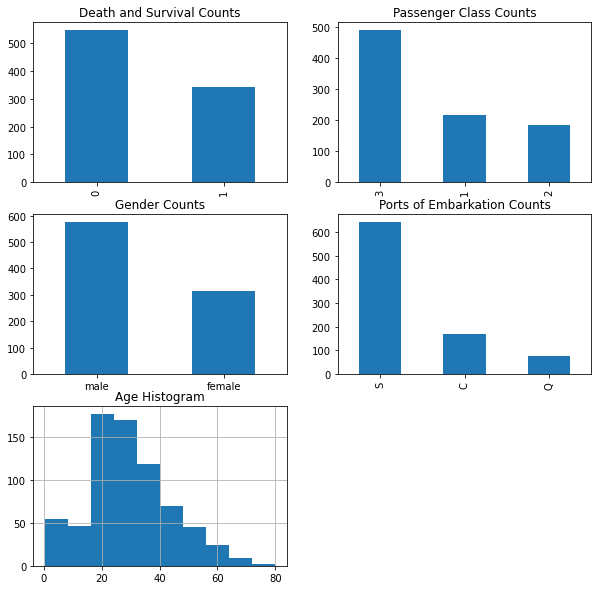

In [7]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

Next we'll explore various features to view their impact on survival rates.

# Feature: Passenger Classes
From our exploratory data analysis in the previous section, we see there are three passenger classes: First, Second, and Third class. We'll determine which proportion of passengers survived based on their passenger class.

Crosstab in Python: By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

Generate a cross tab of Pclass and Survived:

In [8]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

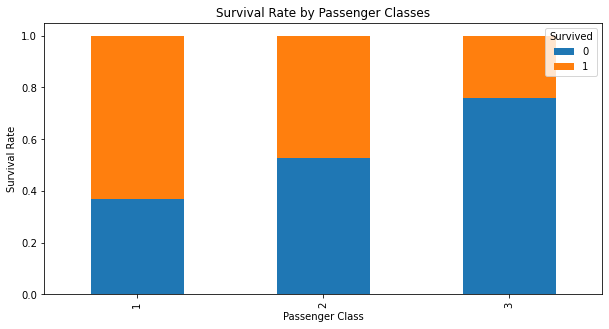

In [9]:
# Plot the cross tab:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

We can see that passenger class seems to have a significant impact on whether a passenger survived. Those in First Class the highest chance for survival.

# Feature: Sex
Gender might have also played a role in determining a passenger's survival rate. We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Sex from a string to a number representation:

In [10]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

Transform Sex from a string to a number representation:

In [11]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Sex_Val and Survived:

<AxesSubplot:title={'center':'Survival Rate by Gender'}, xlabel='Sex_Val'>

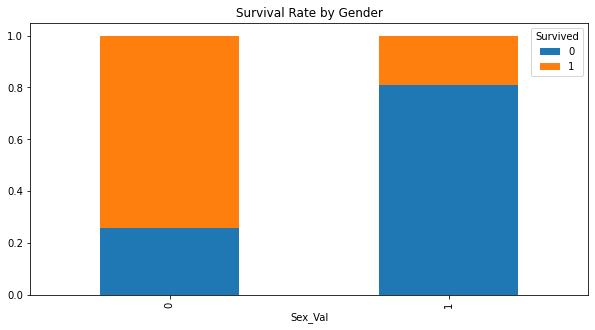

In [12]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at both Sex and Pclass.

Count males and females in each Pclass:

In [13]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print ("M: ", p_class, len(df_train[(df_train['Sex'] == 'male') & 
                              (df_train['Pclass'] == p_class)]))
    print ("F: ", p_class, len(df_train[(df_train['Sex'] == 'female') & 
                              (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Plot survival rate by Sex and Pclass:

Text(0, 0.5, 'Survival Rate')

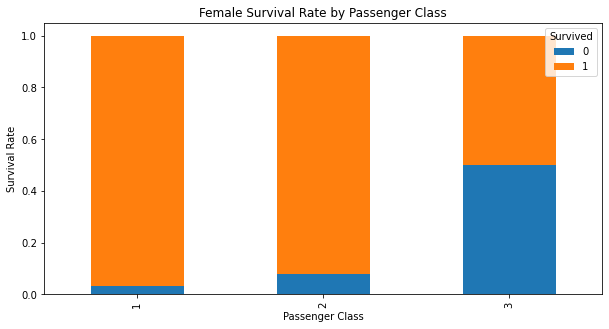

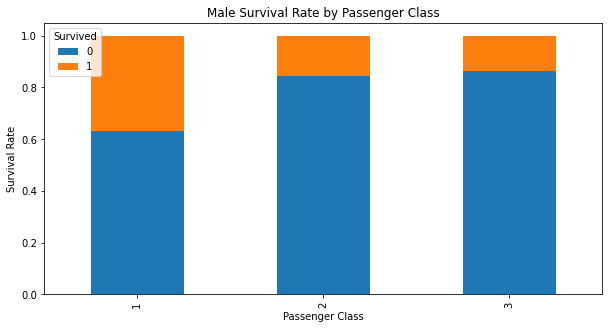

In [14]:
# Plot survival rate by Sex (for females) and Pclass
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Sex (for males) and Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived. Males in First class had the highest chance for survival.

# Feature: Embarked
The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [15]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [16]:
df_train['Embarked_nonull'] = df_train[['Embarked']].replace(np.nan,'nan')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_nonull
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S


Prepare to map Embarked from a string to a number representation:

In [17]:
# Get the unique values of Embarked
embarked_locs = sorted(df_train['Embarked_nonull'].unique())

embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 0, 'Q': 1, 'S': 2, 'nan': 3}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [18]:
df_train['Embarked_Val'] = df_train['Embarked_nonull'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_nonull,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S,2


Plot the histogram for Embarked_Val:

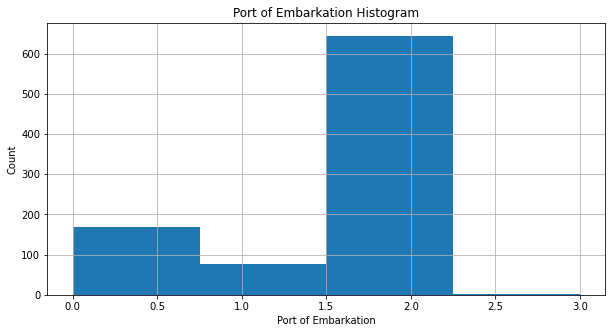

In [19]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the vast majority of passengers embarked in 'S': 2, we assign the missing values in Embarked to 'S':

In [20]:
df_train['Embarked'] = df_train[['Embarked_nonull']].replace('nan','S')
df_train['Embarked_Val'] = df_train[['Embarked_Val']].replace(3,2)

Verify we do not have any more NaNs for Embarked_Val:

In [21]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0, 0.5, 'Survival Rate')

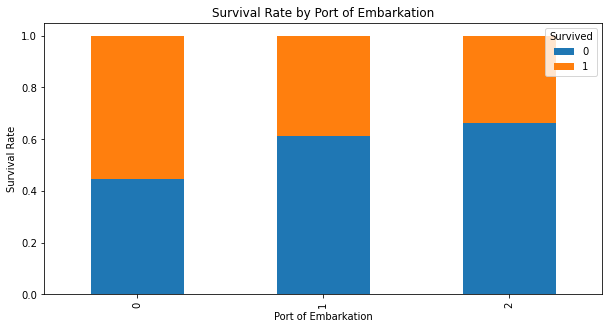

In [22]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 0 had the highest rate of survival. 

Leaving Embarked as integers implies ordering in the values, which does not exist. Another way to represent Embarked without ordering is to create dummy variables:

In [23]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_nonull,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S,2,0,0,1


# Feature: Age
The Age column seems like an important feature--unfortunately it is missing many values. We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [24]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Sex_Val. We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [25]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

Ensure AgeFill does not contain any missing values:

In [26]:
len(df_train[df_train['AgeFill'].isnull()])

0

Plot a normalized cross tab for AgeFill and Survived:

Text(0, 0.5, 'Age')

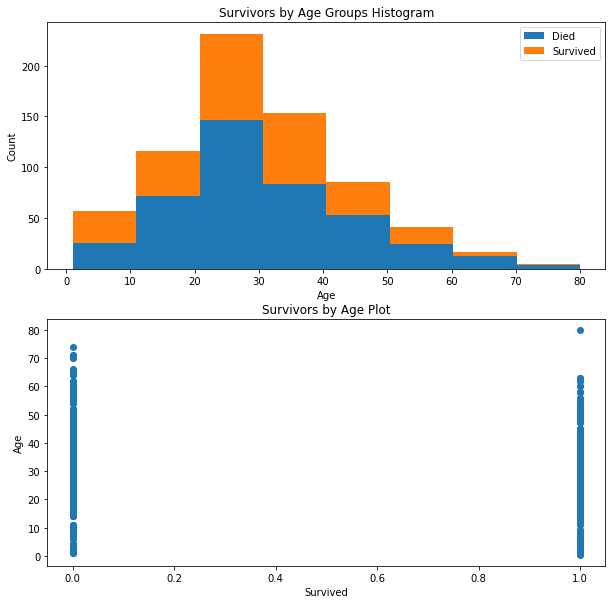

In [27]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

Unfortunately, the graphs above do not seem to clearly show any insights. We'll keep digging further.

Plot AgeFill density by Pclass:

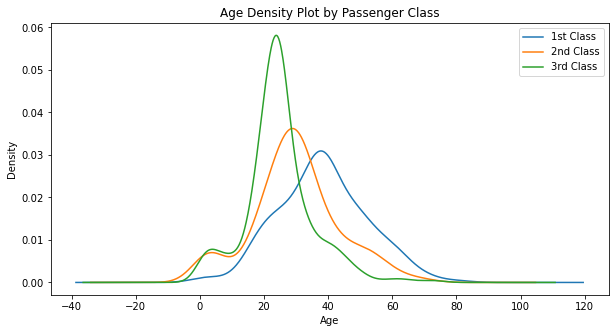

In [28]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers. We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

# Feature: Family Size
Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [29]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_nonull,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S,2,0,0,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,0,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S,2,0,0,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S,2,0,0,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S,2,0,0,1,35.0,0


Text(0.5, 1.0, 'Family Size Histogram')

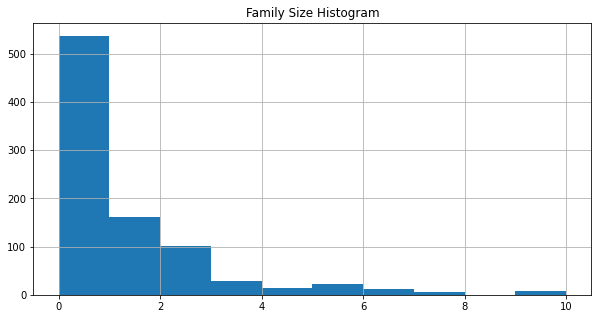

In [30]:
# Plot a histogram of FamilySize:

df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

# Final Data Preparation for Machine Learning
Many machine learning algorithms do not work on strings and they sometimes require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings)

In [31]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name               object
Sex                object
Ticket             object
Cabin              object
Embarked           object
Embarked_nonull    object
dtype: object

Drop the columns we won't use:

In [32]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Drop the following columns:

- The Age column since we will be using the AgeFill column instead.
- The SibSp and Parch columns since we will be using FamilySize instead.
- The PassengerId column since it won't be used as a feature.
- The Embarked_Val and Embarked_nonull as we decided to use dummy variables instead.

In [33]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val', 'Embarked_nonull'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int32
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
AgeFill           float64
FamilySize          int64
dtype: object

Convert the DataFrame to a numpy array:

In [34]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  1.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  1.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  1.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  0.    , 32.    ,  0.    ]])

# Random Forest: Training and Evaluate Model Accuracy

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [36]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


In [37]:
clf = RandomForestClassifier(n_estimators=100)

clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.85
